In [6]:
import os
import numpy as np
from skimage import io, color, util, feature
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import matplotlib.pyplot as plt

In [13]:

# Define the desired size for all images
desired_height = 256
desired_width = 256

# Define the folder path containing the images
folder_path = "/Users/louloules/LOCAL_DISK_PC/ML_Medical_Imaging/ProjectPerso/Project Images"

# Initialize empty lists for images and labels
images = []
labels = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.png'):
        # Load the image
        image_path = os.path.join(folder_path, file_name)
        image = io.imread(image_path)
        
        # Convert RGBA to RGB format (discard alpha channel if it exists)
        if image.shape[2] == 4:
            image = image[:, :, :3]  # Keep only RGB channels, I do that because with png there is trasnparancy that does not allow the conversion to np array
        
        # Resize the image to the desired size
        resized_image = resize(image, (desired_height, desired_width))
        
        # Pad the resized image if necessary to ensure it has the desired dimensions
        padded_image = np.pad(resized_image, ((0, desired_height - resized_image.shape[0]), 
                                               (0, desired_width - resized_image.shape[1]), 
                                               (0, 0)),
                                               mode='constant')
        
        # Extract the label from the filename
        label = 1 if 'YES' in file_name else 0
        
        # Append the padded image and label to the respective lists
        images.append(padded_image)
        labels.append(label)

        # Print the size and shape of the resized and padded image
        #print(f"Image: {file_name}, Resized shape: {padded_image.shape}")



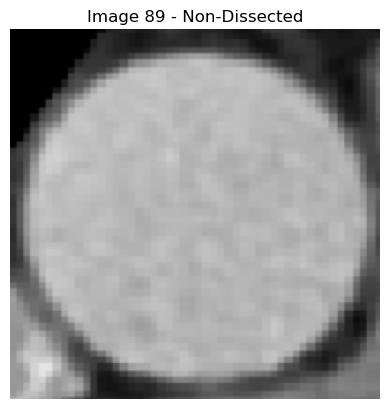

In [14]:
# Visualize an image with its corresponding label
def visualize_image(images, labels, index):
    image = images[index]
    label = labels[index]
    label_name = "Dissected" if label == 1 else "Non-Dissected"
    plt.imshow(image)
    plt.title(f"Image {index + 1} - {label_name}")
    plt.axis('off')
    plt.show()

# Visualize the first image
visualize_image(images, labels, 88)
    

In [15]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [16]:
# Flatten images
num_samples, height, width, channels = images.shape
images_flattened = images.reshape(num_samples, height * width * channels)

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

In [23]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(min_samples_split=5, n_estimators=100)

In [24]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5)

In [25]:
# Evaluate the classifier
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


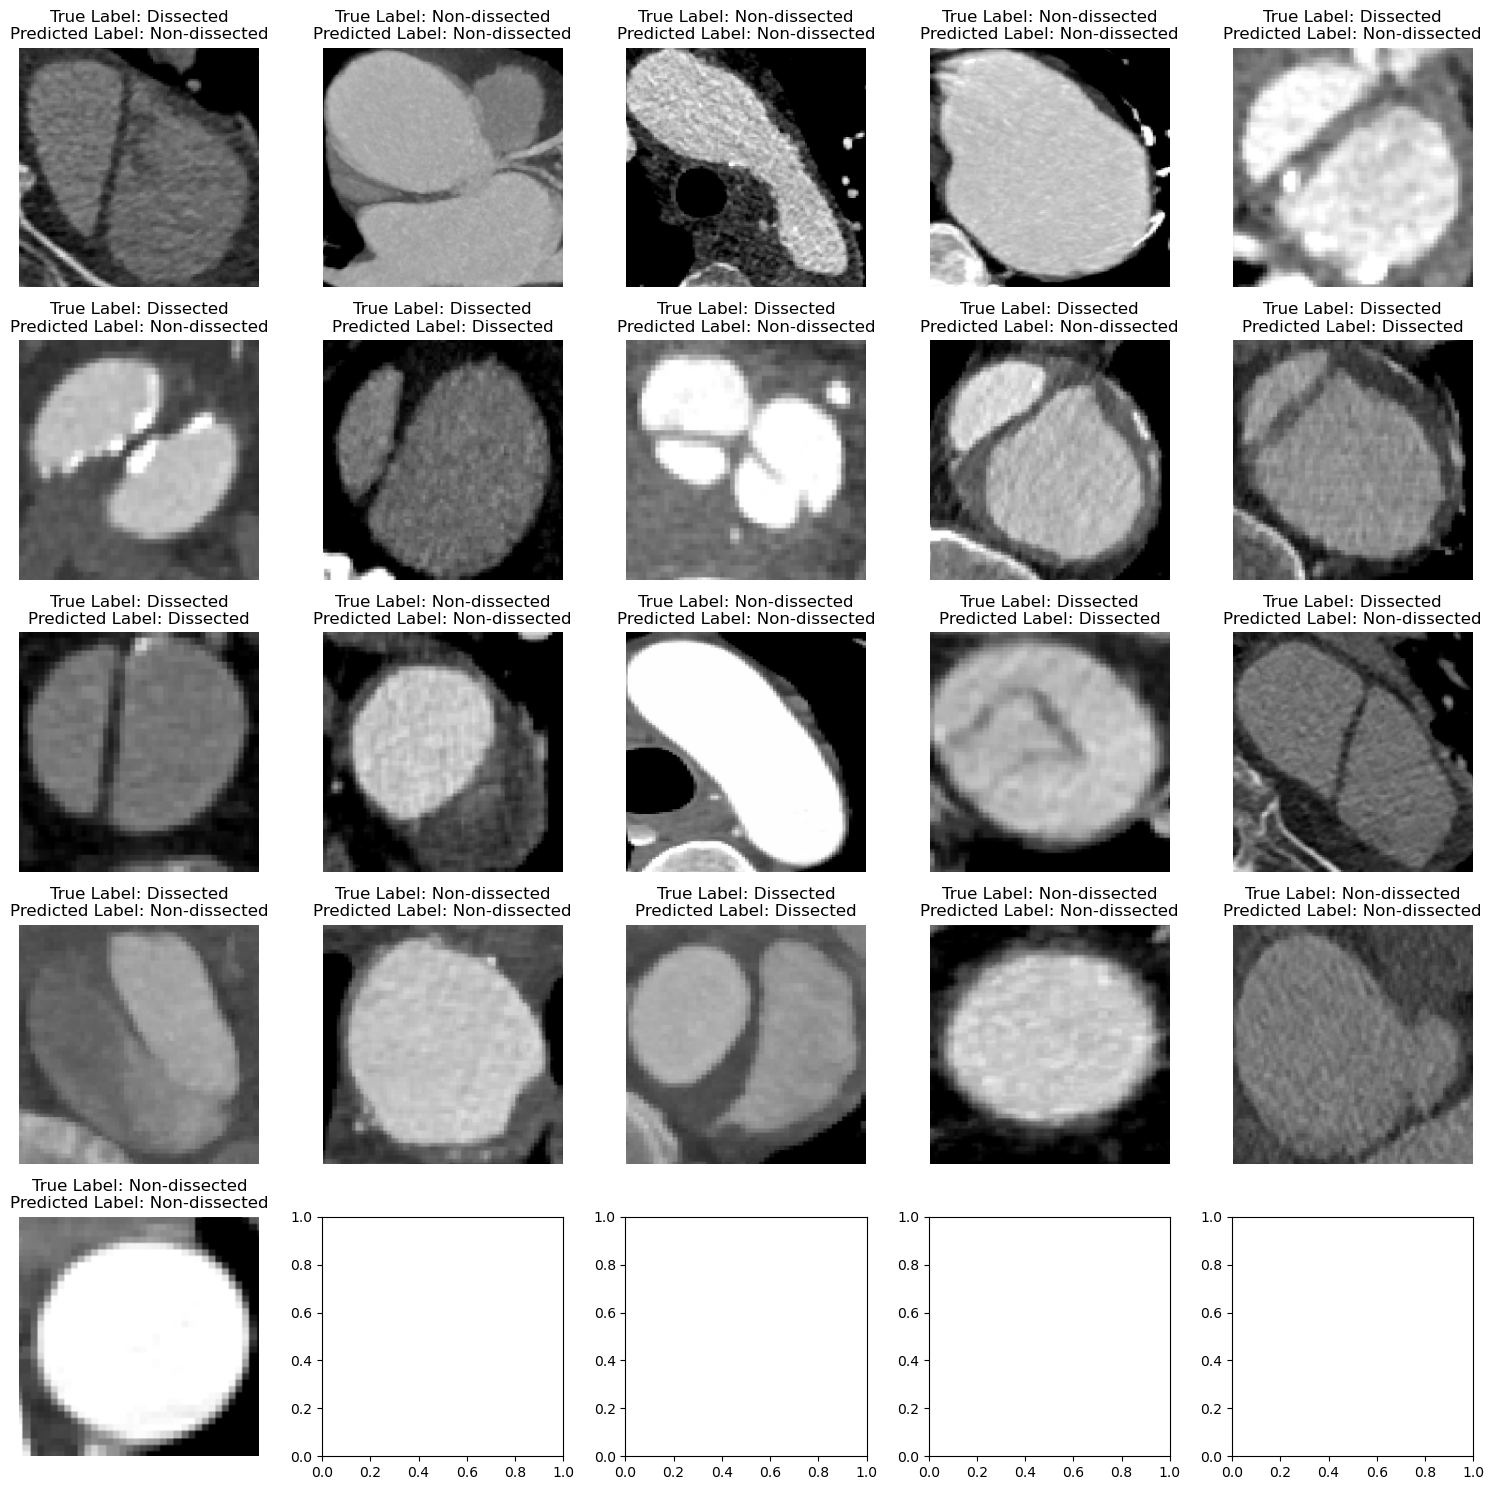

In [26]:
# Define class names for visualization
class_names = ['Non-dissected', 'Dissected']

# Define the number of test images to plot
num_test_images = len(X_test)

# Define the number of columns for subplots
num_columns = 5

# Calculate the number of rows needed
num_rows = (num_test_images + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3*num_rows))

# Flatten the axes array if necessary
if num_test_images == 1:
    axes = [axes]

# Iterate through test images
for i in range(num_test_images):
    # Get the test image and its corresponding label
    test_image = X_test[i].reshape(desired_height, desired_width, channels)
    true_label = y_test[i]

    # Predict the label using the trained classifier
    predicted_label = rf_classifier.predict([X_test[i]])[0]

    # Plot the test image and display the true and predicted labels
    row_index = i // num_columns
    col_index = i % num_columns
    axes[row_index][col_index].imshow(test_image)
    axes[row_index][col_index].set_title(f"True Label: {class_names[true_label]}\nPredicted Label: {class_names[predicted_label]}")
    axes[row_index][col_index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()